# Feature Scaling

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.preprocessing import StandardScaler,normalize,RobustScaler,MinMaxScaler
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
import collections
from sklearn.decomposition import PCA, KernelPCA,TruncatedSVD
%matplotlib inline 

import sys
sys.setrecursionlimit(10000) # or any number you want

all_vars = pd.read_csv('all_vars_outliers_removed copy.csv',header = 0,
                       usecols = ['times','Bx','By','Bz','Vx','Vy','Vz','n','Tpara','Tperp'])



# Scale data 
MMS2_vals = ['times','Bx','By','Bz','Vx','Vy','Vz','n','Tpara','Tperp']


# Scaling with standard scaler
ss_x = StandardScaler().fit_transform(all_vars[MMS2_vals].values)

# scale with robust
rob_x = RobustScaler().fit_transform(all_vars[MMS2_vals].values)


# scale with minmax
min_x = MinMaxScaler().fit_transform(all_vars[MMS2_vals].values)


# PCA

In [28]:
# Find out which scaling method produces the best Silhouette score

# Code pasted directly from "Clustering Complete Pre Lecture Code.ipynb"
kmean = KMeans(n_clusters = 2,init ='k-means++')

# Try scaling with standard scaler
df_pca_ss = pca.fit_transform(ss_x)
model_ss = kmean.fit(df_pca_ss)
y_hc = kmean.predict(df_pca_ss)
labels_ss = kmean.labels_
print("scores of pca  with StandardScaler")
print('Silhoutte score of kmean is ' , silhouette_score(df_pca_ss, labels_ss))
print("\n******************************************************************")

# scale with minmax
df_pca_min = pca.fit_transform(min_x)
model_min = kmean.fit(df_pca_min)
y_h = kmean.fit_predict(df_pca_min)
labels_kmean_min = kmean.labels_
print("scores of pca with MinMaxScaler")
print('Silhoutte score of kmean is ' , silhouette_score(df_pca_min, labels_kmean_min))
print("\n******************************************************************")


# scale with robust
df_pca_rob = pca.fit_transform(rob_x)
model_rob = kmean.fit(df_pca_rob)
y_min = kmean.fit_predict(df_pca_rob)
labels_kmean_rob = kmean.labels_
print("scores of pca with RobustScaler")
print('Silhoutte score of kmean is ' , silhouette_score(df_pca_rob, labels_kmean_rob))
print("\n******************************************************************")

scores of pca  with StandardScaler
Silhoutte score of kmean is  0.2708011811491372

******************************************************************
scores of pca with MinMaxScaler
Silhoutte score of kmean is  0.29534096481897026

******************************************************************
scores of pca with RobustScaler
Silhoutte score of kmean is  0.40963989395537076

******************************************************************


In [57]:
dffff = pd.DataFrame(rob_x)


dffff

,0,1,2,3,4,5,6,7,8,9
0,-1.000083,-0.063898,0.084395,0.014225,0.939391,-0.283274,0.296338,-0.288348,0.888996,1.101678
1,-1.000067,-0.075683,0.097614,0.030232,1.017708,0.106994,0.347851,-0.311903,0.924674,1.003813
2,-1.000050,-0.061320,0.087258,0.029451,0.980450,0.264721,0.324644,-0.252223,0.868512,0.941655
3,-1.000033,-0.071682,0.100172,0.027964,1.014925,-0.123022,0.330590,-0.302547,0.719312,0.918804
4,-1.000017,-0.066099,0.095588,0.027367,1.052626,0.104895,0.272251,-0.271199,0.776816,0.754980
...,...,...,...,...,...,...,...,...,...,...
120246,0.999900,0.329400,0.365633,-0.688409,0.922489,0.244228,-0.546116,0.026695,0.097693,0.058029
120247,0.999917,0.329857,0.361702,-0.692474,0.967164,0.212562,-0.678717,0.065152,0.100869,0.093187
120248,0.999933,0.329857,0.361702,-0.692474,0.847091,0.485222,-0.692801,0.036385,0.040055,0.038576
120249,0.999950,0.329857,0.361702,-0.692474,0.973860,0.286288,-0.458250,-0.015038,0.123204,0.073366


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,normalize,RobustScaler,MinMaxScaler
#import scipy.cluster.hierarchy as shc
# from scipy.cluster.hierarchy import dendrogram, linkage
# import collections
from sklearn.decomposition import PCA
%matplotlib inline 

import sys
sys.setrecursionlimit(20000) # or any number you want

sys.getrecursionlimit()

all_vars = pd.read_csv('all_vars_outliers_removed copy.csv',header = 0,
                       usecols = ['times','Bx','By','Bz','Vx','Vy','Vz','n','Tpara','Tperp'])


indices_to_drop = [36,69,845,909]


all_vars = all_vars.drop(index=indices_to_drop)


all_vars_a = all_vars

print(np.shape(all_vars_a))

scaler = RobustScaler()
robb = scaler.fit_transform(all_vars_a)
pca = PCA()


#pca2 = PCA(n_components = 2)
pca.fit(robb)

scores_pca = pca.transform(robb)


(120251, 10)



Explained Variance Ratio:
[0.4633265  0.14351975 0.1121242  0.10523359 0.06631608 0.04136044
 0.03348953 0.02153463 0.01107698 0.0020183 ]
Total Explained Variance Ratio: 1.0000


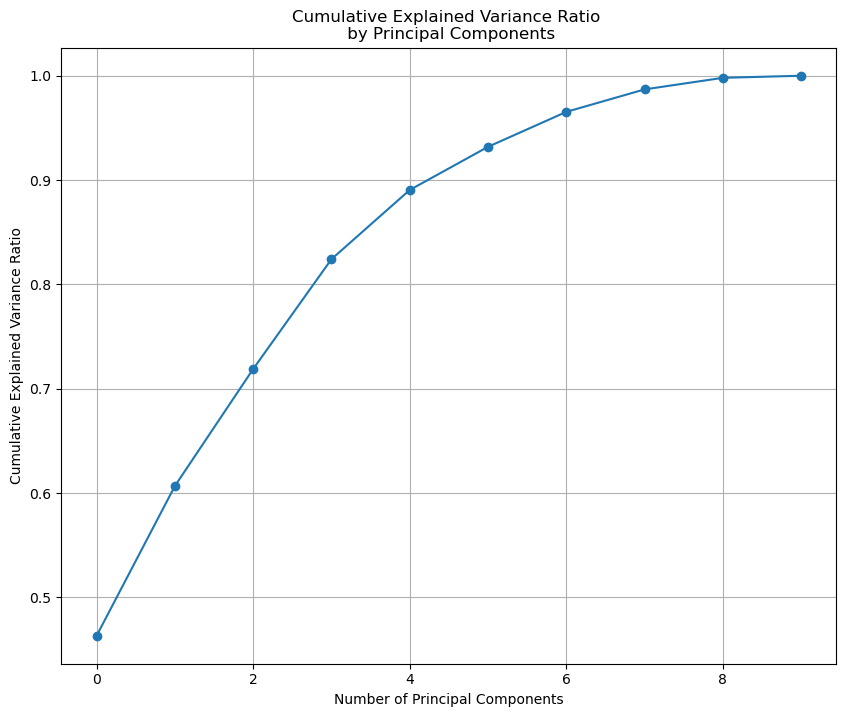

In [8]:
#pca.explained_variance_ratio_[:k].sum()
%matplotlib inline
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()

#Print results
print(f"\nExplained Variance Ratio:\n{explained_variance_ratio}")
print(f"Total Explained Variance Ratio: {total_explained_variance_ratio:.4f}")



# Plot explained variance ratio
fig = plt.figure(figsize=(10,8))
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio \n by Principal Components')
plt.grid()
plt.show()
fig.savefig('cum_explnd_var_ratio_by_PC')
# 

Shape before PCA:  (120251, 10)
Shape after PCA:  (120251, 4)
************************************
PCA components: [[ 0.11247375 -0.08652492 -0.03696055 -0.00309458 -0.28152336 -0.11174591
  -0.20236556  0.81824418 -0.29524335 -0.29849773]
 [-0.13846734  0.72943027 -0.46205593  0.38540453  0.00360069  0.23597891
  -0.15530909  0.03855886 -0.07040333 -0.02150812]
 [ 0.08297465  0.23151943 -0.45022408 -0.55177212  0.03636045 -0.53500889
   0.05526652  0.12583422  0.24782497  0.25396323]
 [-0.19324371 -0.09849863  0.02361705 -0.34712402  0.27112042  0.55118612
  -0.48453419  0.26248545  0.30464483  0.24105841]]
************************************
PCA explained variance: [3.23371182 1.00167274 0.78255258 0.73446068]
************************************
PCA mean: [ 2.49887467e-06 -5.62768234e-02 -1.02939106e-01  1.28483965e-02
  1.40529822e-02  7.02831510e-02 -1.53604578e-02  6.86030842e-01
  5.17760287e-02  1.25832847e-02]


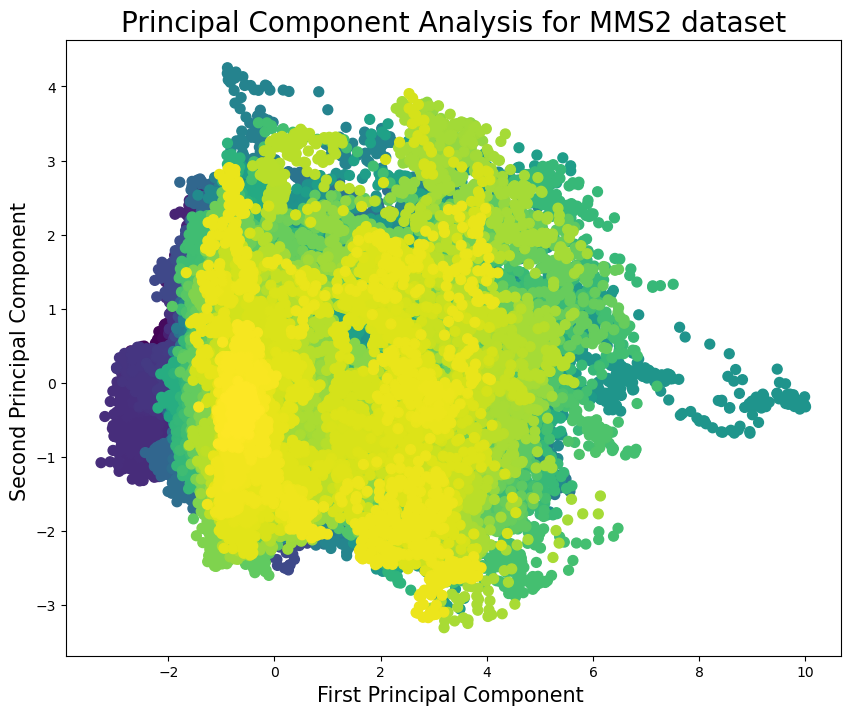

In [9]:
X = all_vars_a.values



y = pd.to_datetime(all_vars['times'],unit='s')



# scale with robust
X = RobustScaler().fit_transform(X)


# Instantiate PCA using 2 components
pca_2 = PCA(n_components = 4)

# Fit PCA to features
PCs = pca_2.fit_transform(X)



print('Shape before PCA: ', X.shape)

print('Shape after PCA: ', PCs.shape)
print('************************************')


# Create a new dataset from principal components 
df = pd.DataFrame(data = PCs, columns = ['PC1', 'PC2','PC3', 'PC4'])


print('PCA components:',pca_2.components_)
print('************************************')
print('PCA explained variance:',pca_2.explained_variance_)
print('************************************')


print('PCA mean:',pca_2.mean_)

fig = plt.figure(figsize=(10,8))

plt.scatter(PCs[:, 0], PCs[:, 1], c=y,s=50)
plt.xlabel('First Principal Component ', fontsize = 15)
plt.ylabel('Second Principal Component ', fontsize = 15)
plt.title('Principal Component Analysis for MMS2 dataset', fontsize = 20)

plt.show()

#fig.savefig('PCA_MMS2')

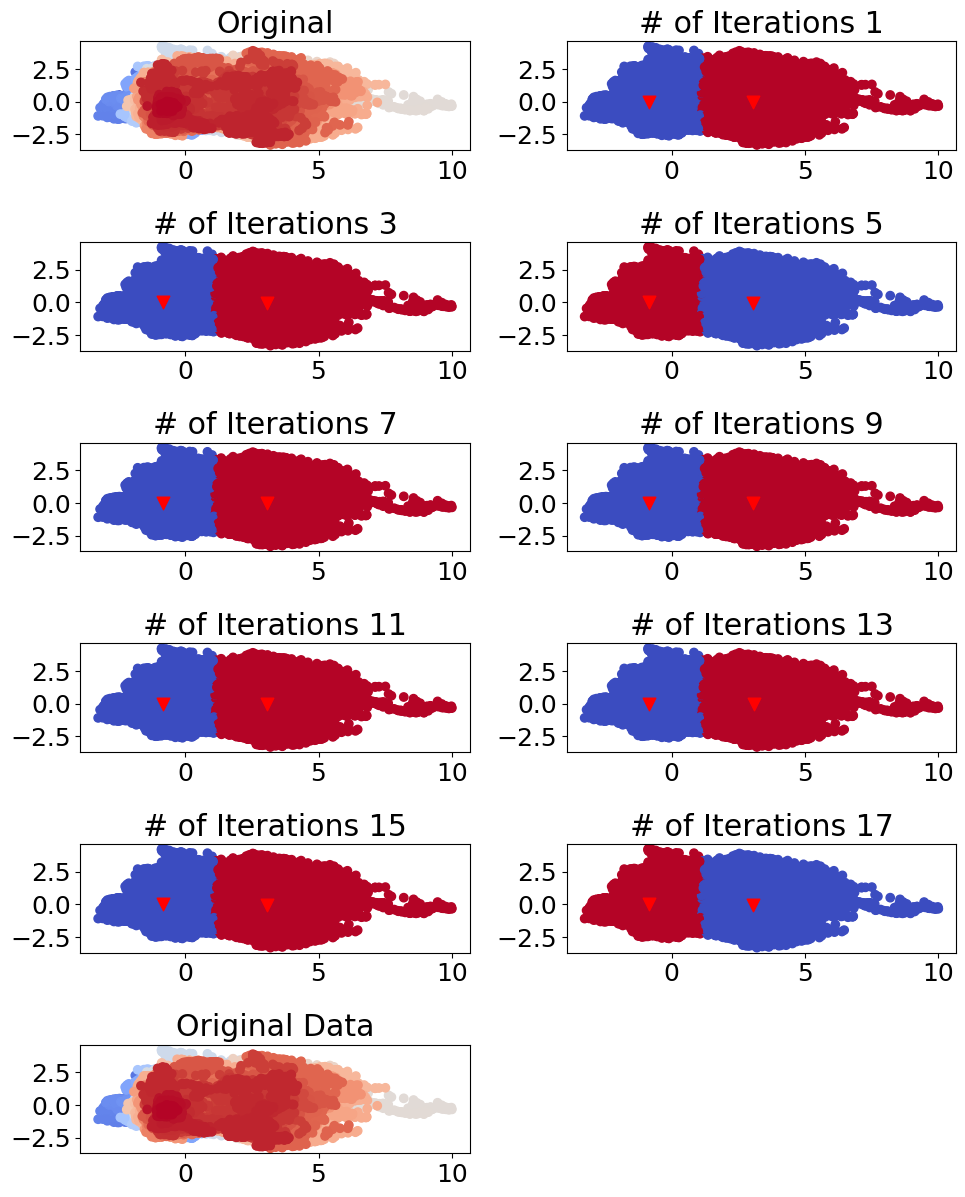

In [53]:
fig = plt.figure(figsize=(10,20))
m = 10
for i in range(1,m):
    #km = KMeans(n_clusters = 2, max_iter = 2*i-1, init = 'k-means++', n_init = 1, random_state = 101)
    km = KMeans(n_clusters = 2, init = 'k-means++')

    km.fit(df)
    labels = km.labels_
    centers = km.cluster_centers_
    
    plt.subplot(m,2,i+1)
    
    plt.scatter(df['PC1'],df['PC2'],c = labels, cmap='coolwarm')
    plt.scatter(x = centers[:,0], y = centers[:,1], color = 'r', marker = 'v',s = 82)
    plt.title("# of Iterations {}".format(2*i-1))
    
plt.subplot(m,2,1)
plt.scatter(df['PC1'],df['PC2'],c = y, cmap = 'coolwarm')
plt.title("Original")

plt.subplot(m,2,m+1)
plt.scatter(df['PC1'],df['PC2'],c = y, cmap = 'coolwarm')
plt.title("Original Data")
    
plt.tight_layout()
plt.show()


fig.savefig('comparison_of_cluster_numbers')

In [14]:
all_vars

,times,Bx,By,Bz,Vx,Vy,Vz,n,Tpara,Tperp
0,1.592426e+09,2.097465,8.011147,10.735126,15.434996,-15.474589,21.248777,0.997805,512.84296,565.21920
1,1.592426e+09,2.071061,8.044910,10.763581,23.745113,-4.320819,23.713049,0.972963,521.85095,540.27750
2,1.592426e+09,2.103240,8.018458,10.762193,19.791689,0.186993,22.602884,1.035904,507.67090,524.43600
3,1.592426e+09,2.080024,8.051444,10.759550,23.449820,-10.894620,22.887327,0.982830,470.00050,518.61220
4,1.592426e+09,2.092533,8.039735,10.758489,27.450294,-4.380808,20.096508,1.015891,484.51923,476.86050
...,...,...,...,...,...,...,...,...,...,...
120250,1.592444e+09,2.978616,8.729470,9.486099,13.641521,-0.398704,-19.052350,1.330059,313.05188,299.23694
120251,1.592444e+09,2.979639,8.719428,9.478873,18.381905,-1.303707,-25.395687,1.370617,313.85394,308.19710
120252,1.592444e+09,2.979639,8.719428,9.478873,5.641086,6.488843,-26.069427,1.340278,298.49936,294.27920
120253,1.592444e+09,2.979639,8.719428,9.478873,19.092445,0.803349,-14.849024,1.286046,319.49307,303.14572


In [15]:
scaler = RobustScaler()

scaled_baseball = all_vars.copy()
scaled_baseball = pd.DataFrame(scaler.fit_transform(scaled_baseball), columns = scaled_baseball.columns)
scaled_baseball.head()

pca = PCA(n_components = 4, svd_solver ='auto')
Principal_components = pca.fit_transform(scaled_baseball)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2','PC 3', 'PC 4'])
print(pca_df)

            PC 1      PC 2      PC 3      PC 4
0      -1.772381 -0.201556  0.431644  0.364761
1      -1.848576 -0.127032  0.192055  0.553153
2      -1.767903 -0.063791  0.091258  0.623414
3      -1.725364 -0.161136  0.243783  0.353829
4      -1.692376 -0.091514  0.100270  0.503744
...          ...       ...       ...       ...
120246 -0.670453 -0.246787  0.198819  0.474495
120247 -0.632503 -0.232421  0.228732  0.554211
120248 -0.615599 -0.161979  0.045154  0.639521
120249 -0.753531 -0.253482  0.192130  0.470810
120250 -0.697227 -0.232690  0.210867  0.541173

[120251 rows x 4 columns]


            PC 1      PC 2      PC 3      PC 4         times
0      -1.772381 -0.201556  0.431644  0.364761  1.592426e+09
1      -1.848576 -0.127032  0.192055  0.553153  1.592426e+09
2      -1.767903 -0.063791  0.091258  0.623414  1.592426e+09
3      -1.725364 -0.161136  0.243783  0.353829  1.592426e+09
4      -1.692376 -0.091514  0.100270  0.503744  1.592426e+09
...          ...       ...       ...       ...           ...
120250 -0.697227 -0.232690  0.210867  0.541173  1.592444e+09
120251       NaN       NaN       NaN       NaN  1.592444e+09
120252       NaN       NaN       NaN       NaN  1.592444e+09
120253       NaN       NaN       NaN       NaN  1.592444e+09
120254       NaN       NaN       NaN       NaN  1.592444e+09

[120255 rows x 5 columns]


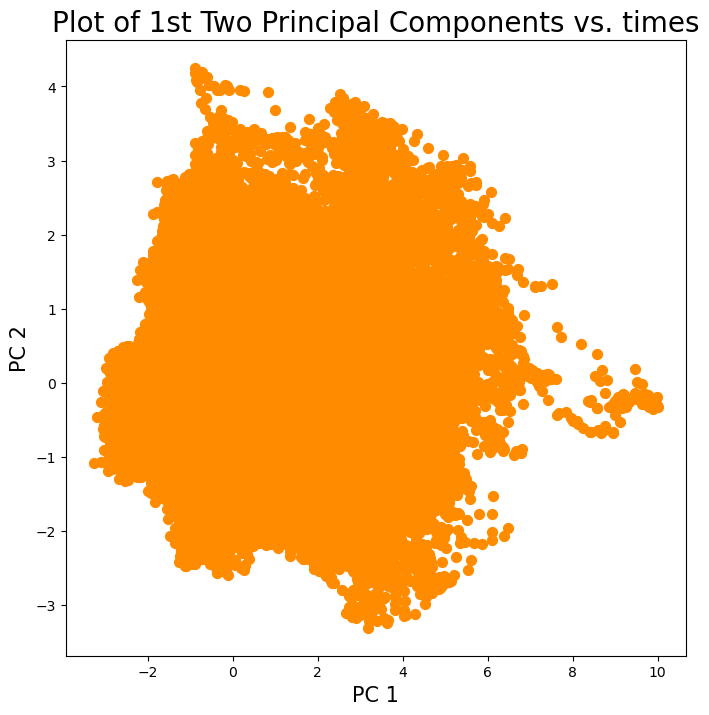

In [16]:
for_visual = pd.concat([pca_df, all_vars['times']], axis = 1)
print(for_visual)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs. times', fontsize = 20)
W_GROUP = ['1st 33%','2nd 33%','3rd 33%']
colors = ['navy', 'turquoise', 'darkorange']
# for WINS_GROUP, color in zip(W_GROUP,colors):
#     indicesToKeep = for_visual['times'] == WINS_GROUP
#     ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
#                , for_visual.loc[indicesToKeep, 'PC 2']
#                , c = color
#                , s = 50)
# ax.legend(W_GROUP)
# ax.grid()

ax.scatter(for_visual['PC 1']
               , for_visual['PC 2']
               , c = color
               , s = 50)

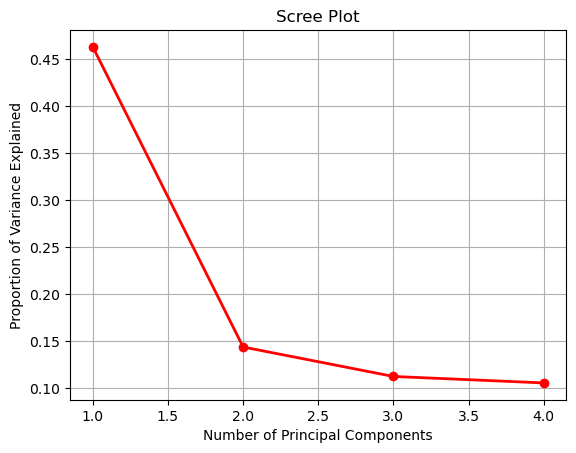

In [19]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()